In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np
# for Linux only, load font file
mpl.font_manager.fontManager.addfont("./arial.ttf")

# configure matplotlib
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9

palette = sns.color_palette("Set1")[0:5] + ["#F9D957"] + sns.color_palette("Set1")[6:] # replace yellow by a darker one
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=palette) 

In [2]:
df = pd.read_csv("m6A_methods.clustered.csv", index_col=0, header=0)

In [3]:
df["m6ACE-seq"] = df[["m6ACE-seq_METTL3", "m6ACE-seq_METTL16", "m6ACE-seq_PCIF1", "m6ACE-seq_FTO_reg", "m6ACE-seq_FTO_OE", "m6ACE-seq_ALKBH5"]].any(axis=1)
df["MAZTER-seq"] = df[["MAZTER-seq_high", "MAZTER-seq_intermediate", "MAZTER-seq_low"]].any(axis=1)

In [4]:
df

,CITS,CIMS,m6ACE-seq_METTL3,m6ACE-seq_METTL16,m6ACE-seq_PCIF1,m6ACE-seq_FTO_reg,m6ACE-seq_FTO_OE,m6ACE-seq_ALKBH5,m6A-label-seq,m6A-REF-seq,...,MAZTER-seq_intermediate,MAZTER-seq_low,DART-seq,xPore,motif_F10,X,Y,Cluster,m6ACE-seq,MAZTER-seq
1@633671@+,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,AAAATAAAAAACTATAACAAA,4.959506,2.146276,1,False,False
1@40374194@+,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,GAGGAGGATAACAAGTTTTGT,5.544519,3.026941,1,False,True
1@200408704@-,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,ATATGGAGAGACACAAGAGGA,4.617918,3.333959,1,False,True
1@200857861@+,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,AAATCAATAAACTGACTGGGA,6.488852,2.618135,1,True,False
1@201876197@+,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,GACACTGATGACAATTCAGAC,5.210930,3.593515,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20@41533236@-,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,AGGAAACGAGAACCGAAAGAG,3.563457,3.696731,7,False,False
20@41533200@-,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,AAGGCCAAGGAGCCGAAGAAG,3.595336,4.486662,7,False,False
20@41076218@+,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,GAGAAGACCAAACACAAAGAT,3.486235,3.842590,7,False,False
20@3785242@-,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,AGGAGGAAGAAGAGGAGGAGG,3.317690,3.672205,7,False,False


In [5]:
# hg38
print(df.groupby("Cluster")["Cluster"].count())

Cluster
1     8869
2    33675
3    13097
4     6897
5     7679
6     2278
7     1684
Name: Cluster, dtype: int64


In [6]:
# extract site list to bed
with open("Clusters.bed", "w") as bed_out:
    for idx, row in df.iterrows():
        chr, pos, strand = idx.split("@")
        pos_0 = int(pos) - 1
        bed_out.write("{}\t{}\t{}\t{}\t{}\t{}\n".format(chr, pos_0, pos, idx, row["Cluster"], strand))

In [7]:
df_all_winscore = pd.read_table("HEK293T_m6A_winscore_filtered_matched_formated.bed", index_col=None, names=["chr", "pos_0", "pos_1", "win_id", "Winscore", "strand"])

In [7]:
!bedtools intersect -wa -wb -a Clusters.bed -b HEK293T_m6A_winscore_filtered_matched_formated.bed > Clusters.winscore.bed

In [8]:
df_winscore = pd.read_table("Clusters.winscore.bed", index_col=None, names=["chr", "pos_0", "pos_1", "key", "Cluster", "strand", "chr1", "win_start", "win_end", "win_id", "Winscore", "strand1"])

In [9]:
df_winscore

,chr,pos_0,pos_1,key,Cluster,strand,chr1,win_start,win_end,win_id,Winscore,strand1
0,1,40374193,40374194,1@40374194@+,1,+,1,40374151,40374202,ENSG00000084070_exon_3_18,-0.352159,+
1,1,40374193,40374194,1@40374194@+,1,+,1,40374176,40374227,ENSG00000084070_exon_3_19,-0.599071,+
2,1,200408703,200408704,1@200408704@-,1,-,1,200408664,200408715,ENSG00000162702_exon_1_150,2.247831,-
3,1,200408703,200408704,1@200408704@-,1,-,1,200408689,200408740,ENSG00000162702_exon_1_151,1.805738,-
4,1,200857860,200857861,1@200857861@+,1,+,1,200857828,200857879,ENSG00000118200_exon_18_4,2.558740,+
...,...,...,...,...,...,...,...,...,...,...,...,...
134965,20,41076217,41076218,20@41076218@+,7,+,20,41076195,41076246,ENSG00000198900_exon_4_2,0.718695,+
134966,20,3785241,3785242,20@3785242@-,7,-,20,3785200,3785251,ENSG00000125817_exon_1_55,1.364952,-
134967,20,3785241,3785242,20@3785242@-,7,-,20,3785225,3785276,ENSG00000125817_exon_1_56,0.829388,-
134968,21,44130752,44130753,21@44130753@+,7,+,21,44130721,44130772,ENSG00000241945_exon_18_6,0.823371,+


In [10]:
df_winscore_groupby = df_winscore.groupby("key")[["Winscore"]].mean()
df_winscore_groupby["Cluster"] = df.loc[df_winscore_groupby.index, "Cluster"]
for i in ["CIMS", "CITS", "m6ACE-seq", "m6A-label-seq", "MAZTER-seq", "m6A-REF-seq", "DART-seq", "xPore"]:
    df_winscore_groupby[i] = df.loc[df_winscore_groupby.index, i]

In [11]:
df_winscore_groupby

,Winscore,Cluster,CIMS,CITS,m6ACE-seq,m6A-label-seq,MAZTER-seq,m6A-REF-seq,DART-seq,xPore
key,,,,,,,,,,
10@100151826@-,2.668982,1,False,False,False,False,True,False,False,False
10@100151900@-,2.417546,4,False,False,True,False,False,False,False,False
10@100152039@-,2.291200,4,False,False,True,False,False,False,False,False
10@100152074@-,2.584463,2,False,False,False,False,True,False,False,False
10@100152252@-,2.790214,3,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
X@9719247@+,1.687117,2,False,False,True,True,False,False,False,False
X@9719280@+,1.202592,2,False,False,False,False,True,False,False,False
Y@10200233@+,-0.084326,2,False,False,False,False,False,False,True,False


In [12]:
df_winscore_groupby.to_csv("raw_winscore.csv")

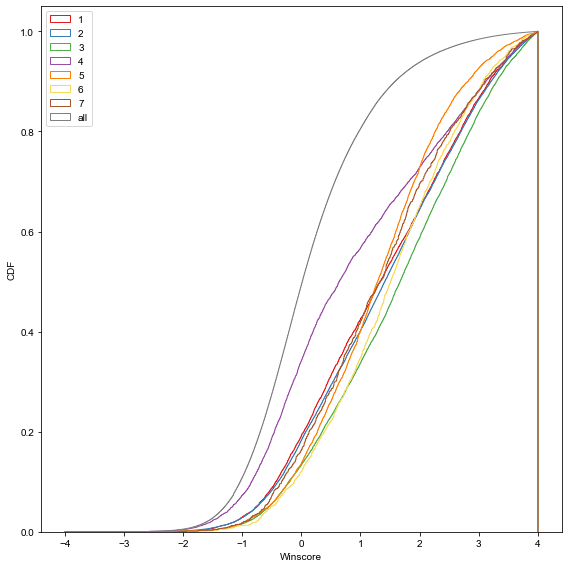

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
for i in range(1, 8):
    subdf = df_winscore_groupby[df_winscore_groupby["Cluster"]==i]
    ax.hist(subdf["Winscore"], density=True, range=[-4, 4], bins=1000,cumulative=True, histtype="step", label=i)
ax.hist(df_all_winscore["Winscore"], density=True, range=[-4, 4], bins=1000,cumulative=True, color="gray", histtype="step", label="all")
ax.set_xlabel("Winscore")
ax.set_ylabel("CDF")
plt.legend(loc=2)
plt.tight_layout()

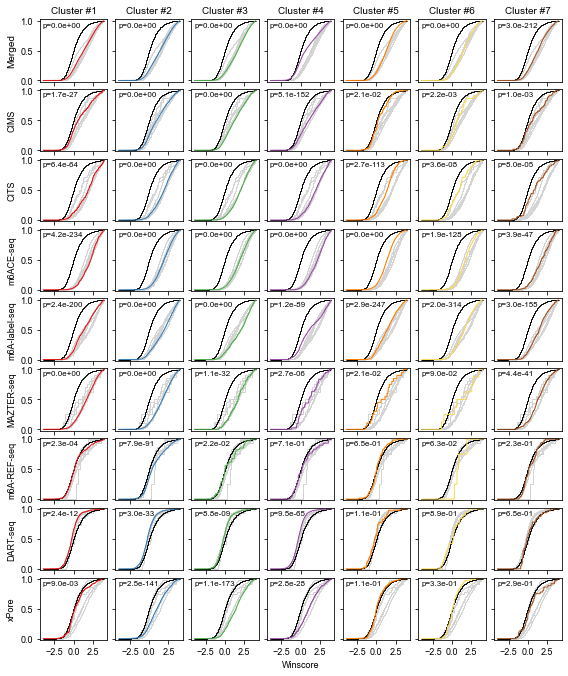

In [21]:
def draw_CDF(ax, df, cluster, row_label=None):
    if row_label is not None:
        subdf = df[df[row_label] == True]
    else:
        subdf = df
    
    subdf_target = subdf[subdf["Cluster"]==cluster]
    if subdf_target.shape[0] > 0:
        # all clusters
        for i in range(1, 8):
            subsubdf = subdf[subdf["Cluster"]==i]
            if i != cluster and subsubdf.shape[0] > 0:
                ax.hist(subsubdf["Winscore"], density=True, range=[-4, 4], bins=500,cumulative=True, color="lightgray", histtype="step", label="all", lw=1)

        # all windows
        ax.hist(df_all_winscore["Winscore"], density=True, range=[-4, 4], bins=500,cumulative=True, color="k", histtype="step", label="all", lw=1)

        ax.hist(subdf_target["Winscore"], density=True, range=[-4, 4], bins=1000, color=palette[cluster-1], cumulative=True, histtype="step", label=i, lw=1)
        
        odd, pvalue = scipy.stats.ks_2samp(subdf_target["Winscore"], df_all_winscore["Winscore"])
        ax.annotate("p={:.1e}".format(pvalue), xycoords="data", xy=(-4, 0.98), ha="left", va="top", size=8)
        
    else:
        ax.set_xlim([-4, 4])
        ax.set_ylim([-4, 4])
    
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylim([-0.02, 1.02])
    
    # remove last point
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
    
fig, axes = plt.subplots(9, 7, figsize=(8.,9.5), sharex=True, sharey=True)

row = 0

for row, row_label in zip(*[range(0, 9), [None, "CIMS", "CITS", "m6ACE-seq", "m6A-label-seq", "MAZTER-seq", "m6A-REF-seq", "DART-seq", "xPore"]]):
    if row_label is not None:
        axes[row][0].set_ylabel(row_label, size=9)
    else:
        axes[row][0].set_ylabel("Merged", size=10)
    for col in range(0, 7):
        ax = axes[row][col]
        draw_CDF(ax, df_winscore_groupby, col+1, row_label=row_label)
for i in range(0, 7):
    axes[0][i].set_title("Cluster #{}".format(i+1), size=10)
    if i == 3:
        axes[-1][i].set_xlabel("Winscore", size=9)
    
# ax.set_xlabel("Winscore")
# ax.set_ylabel("CDF")
# plt.legend(loc=2)
plt.tight_layout()
plt.subplots_adjust(hspace=0.12, wspace=0.12)
plt.savefig("All_methods_vs_winscore.pdf")